In [41]:
import algorithmesChemin as ac
import optimisation as opt
import util as ut
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
a = ut.generationMultigraphe(30,50,14)
b = ut.generationMultigraphe(30,50,14)
x = [a,b]

In [25]:
y = np.zeros((8,8), dtype=object)
for i, nb_sommets in enumerate([2**p for p in range(4,9)]):
    for j, nb_arretes in enumerate([2**p for p in range(4,9)]):
        y[i,j] = ut.generationMultigraphe(nb_sommets,nb_arretes,20)
        nb_tests = 1
        while not ut.testExistanceChemin(y[i,j],'a','k'):
            y[i,j] = ut.generationMultigraphe(nb_sommets,nb_arretes,20)
            nb_tests +=1
        print("found for", nb_sommets,"sommets,", nb_arretes, "arretes")
        print("nb_tests:", nb_tests)

found for 16 sommets, 16 arretes
nb_tests: 7
found for 16 sommets, 32 arretes
nb_tests: 25
found for 16 sommets, 64 arretes
nb_tests: 3
found for 16 sommets, 128 arretes
nb_tests: 2
found for 16 sommets, 256 arretes
nb_tests: 1
found for 32 sommets, 16 arretes
nb_tests: 19
found for 32 sommets, 32 arretes
nb_tests: 16
found for 32 sommets, 64 arretes
nb_tests: 11
found for 32 sommets, 128 arretes
nb_tests: 2
found for 32 sommets, 256 arretes
nb_tests: 2
found for 64 sommets, 16 arretes
nb_tests: 404
found for 64 sommets, 32 arretes
nb_tests: 2
found for 64 sommets, 64 arretes
nb_tests: 29
found for 64 sommets, 128 arretes
nb_tests: 26
found for 64 sommets, 256 arretes
nb_tests: 3
found for 128 sommets, 16 arretes
nb_tests: 782
found for 128 sommets, 32 arretes
nb_tests: 45
found for 128 sommets, 64 arretes
nb_tests: 361
found for 128 sommets, 128 arretes
nb_tests: 13
found for 128 sommets, 256 arretes
nb_tests: 82
found for 256 sommets, 16 arretes
nb_tests: 1563
found for 256 sommets, 

In [26]:
y[0,0]

{'a': [('e', 6, 1), ('l', 13, 1), ('k', 6, 1)],
 'b': [('f', 13, 1)],
 'c': [('e', 1, 1)],
 'd': [('h', 4, 1)],
 'e': [('n', 4, 1), ('m', 11, 1)],
 'f': [],
 'g': [('d', 1, 1)],
 'h': [],
 'i': [],
 'j': [],
 'k': [('g', 6, 1)],
 'l': [],
 'm': [],
 'n': [('m', 12, 1), ('b', 13, 1), ('g', 2, 1), ('l', 6, 1)],
 'o': [],
 'p': [('b', 2, 1), ('k', 19, 1)]}

In [38]:
z = np.zeros((5,5),dtype=tuple)
for nb_sommets in range(5):
    print("sommets:",nb_sommets)
    for nb_arcs in range(5):
        print("arcs:", nb_arcs)
        
        g = y[nb_sommets, nb_arcs]
        
        g = ut.transformeGraphe(g,True)
        
        t0 = time.time()
        ac.cheminArriveeAuPlusTot(g,'a','k')
        t1 = time.time() - t0
        
        t0 = time.time()
        ac.cheminDepartAuPlusTard(g,'a','k')
        t2 = time.time() - t0
        
        t0 = time.time()
        ac.cheminPlusRapide(g,'a','k')
        t3 = time.time() - t0
        
        t0 = time.time()
        ac.cheminPlusCourt(g,'a','k')
        t4 = time.time() - t0
        
        z[nb_sommets, nb_arcs] = (t1, t2, t3, t4)

sommets: 0
arcs: 0
arcs: 1
arcs: 2
arcs: 3
arcs: 4
sommets: 1
arcs: 0
arcs: 1
arcs: 2
arcs: 3
arcs: 4
sommets: 2
arcs: 0
arcs: 1
arcs: 2
arcs: 3
arcs: 4
sommets: 3
arcs: 0
arcs: 1
arcs: 2
arcs: 3
arcs: 4
sommets: 4
arcs: 0
arcs: 1
arcs: 2
arcs: 3
arcs: 4


In [ ]:
a = []
for i in range(5):
    a.append(z[i,4][1])

In [48]:
z.shape

(5, 5)

In [49]:
z[1,1]

(3.8623809814453125e-05,
 2.09808349609375e-05,
 2.1219253540039062e-05,
 0.0004532337188720703)

pour algorithme 0
pour 16 sommets, en fonction des arretes
pour 25 sommets, en fonction des arretes
pour 36 sommets, en fonction des arretes
pour 49 sommets, en fonction des arretes
pour 64 sommets, en fonction des arretes
pour algorithme 1
pour 16 sommets, en fonction des arretes
pour 25 sommets, en fonction des arretes
pour 36 sommets, en fonction des arretes
pour 49 sommets, en fonction des arretes
pour 64 sommets, en fonction des arretes
pour algorithme 2
pour 16 sommets, en fonction des arretes
pour 25 sommets, en fonction des arretes
pour 36 sommets, en fonction des arretes
pour 49 sommets, en fonction des arretes
pour 64 sommets, en fonction des arretes
pour algorithme 3
pour 16 sommets, en fonction des arretes
pour 25 sommets, en fonction des arretes
pour 36 sommets, en fonction des arretes
pour 49 sommets, en fonction des arretes
pour 64 sommets, en fonction des arretes


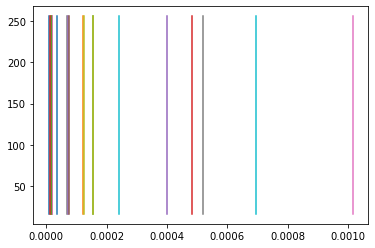

In [53]:
for i in range(4):
    print("pour algorithme",i)
    for j in range(5):
        tmp = []
        print("pour",(j+4)**2,"sommets, en fonction des arretes")
        for k in range(5):
            tmp.append(z[i,j][i])
        plt.plot(tmp,[16,32,64,128,256])
        plt.show